In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("spam.csv", encoding='iso-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
del df['Unnamed: 2']

In [5]:
del df['Unnamed: 3']

In [6]:
del df['Unnamed: 4']

In [ ]:
#df = df[["v1", "v2"]]
# ya da bu şekilde  diğer sütunlar silinir

In [ ]:
#df.drop["sütun isimleri"] bu da siler

In [ ]:
df.columns=["Class","Text"] # sütun isimlerini class ve text diye değiştirdik

In [9]:
df.head(2)

,Class,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [10]:
df['Label']=df.Class.map({'ham':0,'spam':1})  # class sütuunda ham için 0 ile değiştirdik bunları label sütununu değiştirmeden yaptık

In [11]:
df.head(1)

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0


In [12]:
df.Class.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Class, dtype: float64

In [13]:
import seaborn as sns

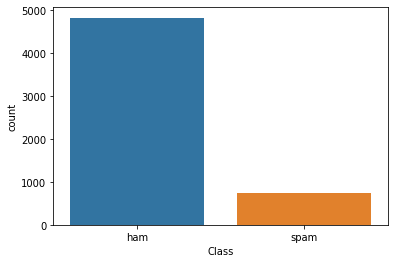

In [14]:
sns.countplot(data=df,x='Class');

In [15]:
df['Text']=df['Text'].str.lower()
df['Text']=df['Text'].str.replace('[^\w\s]','')
df['Text']=df['Text'].str.replace('\d+','')
df['Text']=df['Text'].str.replace('\n',' ').replace('\r','')

D:\programlar\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
D:\programlar\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
def woc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100).generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [17]:
ham=df.query("Class=='ham'")['Text'] # ham yazan yazı ve spam yazanları ayırıp bunları wordcloud yapacağız

In [18]:
spam=df.query("Class=='spam'")['Text']

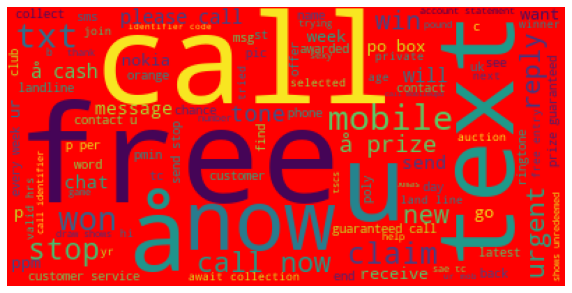

In [19]:
woc(spam,'red')

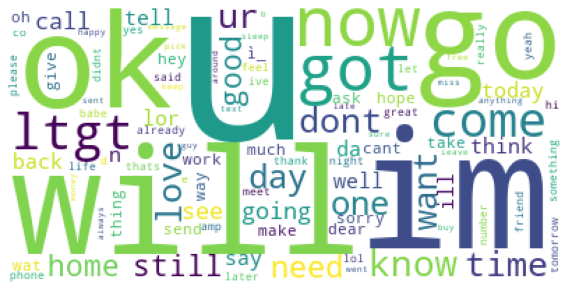

In [20]:
woc(ham,'white')

In [21]:
import nltk

In [22]:
ham_freq=nltk.FreqDist(ham) # hangi kelimenin kaç kez geçtiğini bulmak için yapıyoruz burada cümleleri buldu

In [23]:
ham_freq

FreqDist({'sorry ill call later': 30, 'ok': 19, 'i cant pick the phone right now pls send a message': 12, 'okie': 7, 'ok lor': 5, 'sorry ill call later in meeting': 4, 'wen ur lovable bcums angry wid u dnt take it seriously coz being angry is d most childish n true way of showing deep affection care n luv kettoda manda have nice day da': 4, 'your opinion about me  over  jada  kusruthi  lovable  silent  spl character  not matured  stylish  simple pls reply': 4, ' wonders in my world th you th ur style th ur smile th ur personality rd ur nature nd ur sms and st ur lovely friendship good morning dear': 4, 'say this slowly godi love you amp i need youclean my heart with your bloodsend this to ten special people amp u c miracle tomorrow do itplspls do it': 4, ...})

In [24]:
x_train,x_test,y_train,y_test=train_test_split(df["Text"],df["Label"],random_state=13)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
vect=CountVectorizer(lowercase=True,stop_words='english',)
x_train_dtm=vect.fit_transform(x_train)
print(x_train_dtm)
x_test_dtm=vect.transform(x_test)

  (0, 2535)	1
  (0, 2745)	1
  (1, 2562)	1
  (1, 1142)	1
  (1, 4070)	1
  (2, 415)	1
  (2, 3318)	1
  (2, 3209)	1
  (2, 7040)	1
  (3, 2460)	1
  (3, 6303)	1
  (3, 2888)	1
  (3, 723)	1
  (3, 3357)	1
  (3, 3114)	1
  (3, 4700)	1
  (3, 3525)	1
  (3, 5499)	1
  (3, 805)	1
  (3, 13)	1
  (4, 6881)	1
  (4, 2595)	1
  (4, 4192)	1
  (4, 141)	1
  (4, 4842)	1
  :	:
  (4175, 2499)	1
  (4175, 4496)	1
  (4175, 3635)	1
  (4175, 5337)	1
  (4175, 1215)	1
  (4175, 2658)	1
  (4175, 4385)	1
  (4175, 6627)	1
  (4175, 777)	1
  (4176, 902)	1
  (4176, 1058)	1
  (4176, 3741)	1
  (4176, 413)	1
  (4176, 6056)	1
  (4176, 4496)	1
  (4176, 4498)	1
  (4176, 581)	1
  (4176, 4234)	1
  (4176, 6791)	1
  (4176, 6500)	1
  (4176, 2924)	1
  (4176, 7089)	1
  (4178, 2846)	1
  (4178, 3273)	1
  (4178, 5572)	1


In [27]:
tf1=pd.DataFrame(x_test_dtm.toarray(),columns=vect.get_feature_names())
tf1

,____,aa,aah,aaniye,aaooooright,aathilove,aathiwhere,abbey,abdomen,abeg,...,åòharry,åòits,åômorrow,ì_,ì_ll,ìï,ìïll,û_,û_thanks,ûò
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train)
x_test_dtm=vect.transform(x_test)

In [30]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
nb=MultinomialNB()
nb.fit(x_train_dtm,y_train)
y_pred_class=nb.predict(x_test_dtm)

In [34]:
from sklearn import metrics

In [35]:
metrics.accuracy_score(y_test,y_pred_class)

0.9849246231155779